<a href="https://colab.research.google.com/github/neha2gupta7/Web-Scrapping/blob/main/Numerical_Programming_in_Python_Web_Scraping_Neha_Gupta_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
url_list=[]
for x in soup.find_all('a', class_="title-list-grid__item--link"):
  url_list.append('https://www.justwatch.com'+x['href'])

print(len(url_list))
print(url_list)

100
['https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/stree', 'https://www.justwatch.com/in/movie/chandu-champion', 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes', 'https://www.justwatch.com/in/movie/aadujeevitham', 'https://www.justwatch.com/in/movie/agent', 'https://www.justwatch.com/in/movie/deadpool', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare', 'https://www.justwatch.com/in/movie/indian-2', 'https://www.justwatch.com/in/movie/phir-aayi-hasseen-dillruba', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/laila-majnu', 'https://www.justwatch.com/in/movie/the-gangster-the

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
import time
movie_title = []

for url in url_list:
  try:
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.text,'html.parser')
    title=soup.find_all('h1')[0].text
  except:
    title='NA'

  movie_title.append(title)
  time.sleep(1)

print(movie_title)
print(len(movie_title))

[' Kalki 2898-AD (2024)', ' Kill (2024)', ' Munjya (2024)', ' Maharaja (2024)', ' Deadpool & Wolverine (2024)', ' Stree 2: Sarkate Ka Aatank (2024)', ' Stree (2018)', ' Chandu Champion (2024)', ' Kingdom of the Planet of the Apes (2024)', ' The Goat Life (2024)', ' Agent (2023)', ' Deadpool (2016)', ' Dune: Part Two (2024)', ' The Ministry of Ungentlemanly Warfare (2024)', ' Indian 2 (2024)', ' Phir Aayi Hasseen Dillruba (2024)', ' Aavesham (2024)', ' Laila Majnu (2018)', ' The Gangster, the Cop, the Devil (2019)', ' The Fall Guy (2024)', ' Bhaiyya Ji (2024)', ' 365 Days (2020)', ' Ullozhukku (2024)', ' Raayan (2024)', ' Weapon (2024)', ' Furiosa: A Mad Max Saga (2024)', ' Bad Boys: Ride or Die (2024)', ' Je Jatt Vigad Gya (2024)', ' Harom Hara (2024)', ' Golam (2024)', ' A Quiet Place: Day One (2024)', ' Mr. & Mrs. Mahi (2024)', ' Deadpool 2 (2018)', ' Love Lies Bleeding (2024)', ' Salaar (2023)', ' Savi (2024)', ' Maharshi (2019)', ' Dune (2021)', ' Aattam (2024)', ' Twisters (2024)'

## **Scrapping release Year**

In [ ]:
# Write Your Code here
import time
movie_year=[]

for url in url_list:
  try:
    response=requests.get(url,headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    year=soup.find_all('span',class_='release-year')[0].text.strip('()')
  except:
    year='NA'

  movie_year.append(year)
  time.sleep(1)

print(movie_year)
print(len(movie_year))

['2024', '2024', '2024', '2024', '2024', '2024', '2018', '2024', '2024', '2024', '2023', '2016', '2024', '2024', '2024', '2024', '2024', '2018', '2019', '2024', '2024', '2020', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2018', '2024', '2023', '2024', '2019', '2021', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2023', '2022', '2024', '2024', '2024', '2024', '2023', '2009', '2024', '2023', '2024', '2023', '2024', '2016', '2023', '2021', '2024', '2024', '2024', '2015', '2024', '2011', '2024', '2024', '2024', '2001', '2016', '2024', '2024', '2024', '2024', '2002', '2024', '2015', '2018', '2017', '2004', '2023', '2024', '2024', '2018', '2014', '2024', '2024', '2022', '2013', '2022', '2013', '2015', '2018', '2023', '2003', '2022', '2019']
100


## **Scrapping Genres**

In [ ]:
# Write Your Code here
import time
movie_genre = []

for url in url_list:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Genres':
        genre=x.find_all('span')[0].text
  except:
    genre='NA'

  movie_genre.append(genre)
  time.sleep(1)

print(len(movie_genre))
print(movie_genre)


100
['Drama, Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Comedy, Horror', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Comedy, Science-Fiction, Action & Adventure', 'Horror, Comedy', 'Horror, Comedy, Drama', 'Drama, History, Sport, War & Military, Action & Adventure', 'Science-Fiction, Drama, Mystery & Thriller, Action & Adventure', 'Drama', 'Mystery & Thriller, Action & Adventure', 'Comedy, Action & Adventure', 'Science-Fiction, Action & Adventure, Drama', 'War & Military, Action & Adventure, Comedy', 'Action & Adventure, Drama, Mystery & Thriller', 'Mystery & Thriller, Romance, Crime, Drama', 'Comedy, Action & Adventure', 'Drama, Romance', 'Mystery & Thriller, Action & Adventure, Crime', 'Comedy, Drama, Romance, Action & Adventure', 'Action & Adventure, Drama', 'Drama, Romance, Made in Europe', 'Drama', 'Action & Adventure, Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Acti

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
import time
movie_imdbrating=[]

for url in url_list:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     for x in soup.find_all('div',class_='title-detail-hero-details__item'):
      imdbratings = soup.find_all('span', class_='imdb-score')
      if imdbratings:
        imdbrating = imdbratings[0].text.strip().split()[0]   # If we want all values IMDb then we can use code imdbrating = imdbratings[0].text.strip()
  except:
    imdbrating='NA'

  movie_imdbrating.append(imdbrating)
  time.sleep(1)

print(len(movie_imdbrating))
print(movie_imdbrating)

100
['7.5', '7.6', '7.1', '8.6', '8.0', '7.9', '7.5', '8.0', '6.9', '7.8', '4.2', '8.0', '8.5', '6.8', '4.1', '5.8', '7.9', '7.7', '6.9', '6.9', '5.1', '3.3', '7.6', '6.8', '6.9', '7.6', '6.7', '4.8', '8.0', '7.3', '6.4', '6.0', '7.6', '6.7', '6.5', '6.6', '7.2', '8.0', '8.2', '6.7', '6.5', '8.4', '7.8', '5.3', '6.2', '8.3', '7.9', '6.7', '8.3', '7.4', '6.8', '6.3', '7.7', '4.3', '6.1', '6.7', '5.5', '6.2', '6.1', '8.3', '8.9', '6.9', '7.0', '7.0', '7.8', '8.1', '5.1', '7.8', '6.0', '7.8', '6.9', '7.6', '7.1', '6.8', '7.1', '7.5', '6.5', '7.3', '7.2', '7.1', '8.2', '8.1', '8.3', '6.9', '6.9', '5.4', '8.2', '7.7', '5.7', '8.8', '8.7', '8.2', '8.3', '8.2', '7.0', '7.3', '6.7', '8.1', '7.0', '8.2']


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
import time
movie_runtime = []

for url in url_list:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Runtime':
        runtime=x.find_all('div')[0].text
  except:
    runtime='NA'

  movie_runtime.append(runtime)
  time.sleep(1)

print(len(movie_runtime))
print(movie_runtime)


100
['3h 1min', '1h 45min', '2h 3min', '2h 30min', '2h 8min', '2h 27min', '2h 8min', '2h 22min', '2h 25min', '2h 0min', '2h 34min', '1h 48min', '2h 47min', '2h 2min', '3h 0min', '2h 13min', '2h 38min', '2h 19min', '1h 50min', '2h 6min', '2h 30min', '1h 54min', '2h 3min', '2h 25min', '2h 0min', '2h 28min', '1h 55min', '2h 12min', '2h 34min', '2h 0min', '1h 39min', '2h 19min', '2h 0min', '1h 44min', '2h 55min', '2h 3min', '2h 56min', '2h 35min', '2h 19min', '2h 3min', '2h 12min', '2h 2min', '1h 37min', '2h 39min', '1h 34min', '3h 0min', '2h 4min', '2h 36min', '2h 15min', '2h 28min', '2h 10min', '1h 34min', '2h 30min', '2h 34min', '1h 55min', '2h 37min', '1h 49min', '3h 24min', '1h 55min', '2h 41min', '2h 26min', '2h 15min', '1h 41min', '2h 30min', '2h 36min', '1h 35min', '2h 28min', '2h 39min', '2h 20min', '2h 39min', '1h 55min', '2h 32min', '2h 50min', '2h 16min', '1h 49min', '2h 14min', '2h 12min', '1h 36min', '2h 13min', '2h 2min', '1h 53min', '2h 3min', '1h 48min', '2h 49min', '2h 14

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
import time
movie_agerating=[]

for url in url_list:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Age rating':
        age_rating=x.find_all('div')[0].text
  except:
    runtime='NA'

  movie_agerating.append(age_rating)
  time.sleep(1)

print(len(movie_agerating))
print(movie_agerating)

100
['UA', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'U', 'A', 'UA', 'A', 'A', 'A', 'A', 'UA', 'UA', 'U', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'U', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'UA', 'U', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'U', 'U', 'A', 'UA', 'U', 'U', 'U', 'UA', 'UA', 'UA', 'A', 'U', 'UA', 'UA', 'UA', 'U', 'UA', 'U', 'UA', 'UA', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'U', 'UA', 'A', 'UA', 'A', 'A', 'UA', 'A', 'A']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
import time
movie_productioncountries=[]

for url in url_list:
  try:
     content=requests.get(url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div', class_='detail-infos'):
      if x.find_all('h3')[0].text == ' Production country ':
        production_country = x.find_all('div')[0].text
  except:
    production_country='NA'

  movie_productioncountries.append(production_country)
  time.sleep(1)

print(len(movie_productioncountries))
print(movie_productioncountries)

100
['India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States', 'United States, India', 'India', 'United States', 'United States', 'Turkey, United States, United Kingdom', 'India', 'India', 'India', 'India', 'South Korea', 'Australia, Canada, United States', 'India', 'Poland', 'India', 'India', 'India', 'Australia, United States', 'United States', 'India', 'India', 'India', 'United States, United Kingdom, Canada', 'India', 'United States', 'United Kingdom, United States', 'India', 'India', 'India', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'India', 'United States', 'United Kingdom, United States', 'Japan, Germany', 'India', 'India', 'India', 'United States', 'United States', 'India', 'Thailand, China, India', 'United States', 'United States, Canada', 'United States', 'India', 'United States', 'India, United States', 'India', 'India', 'Canada, United States', 'India', 'India', 'United States', 'India', 'India', 'I

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
import time
movie_streaming_services=[]

for url in url_list:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     names=(x['alt'] for x in soup.find_all('img', class_="offer__icon"))
  except:
    names='NA'

  movie_streaming_services.append(" , ".join(names))
  time.sleep(1)

print(len(movie_streaming_services))
print(movie_streaming_services)

100
['Amazon Prime Video , Amazon Prime Video , Netflix , Amazon Video , Bookmyshow', '', 'Hotstar', 'Netflix , Bookmyshow', 'Bookmyshow', 'Bookmyshow', 'Apple TV , Hotstar , Apple TV , Apple TV', 'Amazon Prime Video , Amazon Prime Video , Bookmyshow', 'Apple TV , Hotstar , Apple TV , Amazon Video , Apple TV', 'Netflix', '', 'Apple TV , Hotstar , Amazon Video , Apple TV , Apple TV', 'Apple TV , Jio Cinema , Amazon Video , Apple TV , Apple TV', 'Amazon Prime Video , Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video , Amazon Prime Video , Hotstar , Amazon Video', 'Zee5', '', 'Apple TV , Zee5 , Amazon Video , Apple TV , Apple TV', 'Zee5', 'Netflix', 'Amazon Prime Video , Amazon Prime Video , Amazon Video', 'Amazon Prime Video , Amazon Prime Video , Sun Nxt , Amazon Video , Bookmyshow', 'Amazon Prime Video , Amazon Prime Video , aha', 'Apple TV , Amazon Video , Apple TV , Apple TV', 'Apple TV , Zee5 , Amazon Video , Apple TV , Apple TV', '', 'Amazon Prime Video , Amazon Prime 

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
info_dict = {
    'url': url_list,
    'title': movie_title,
    'release_year': movie_year,
    'genre': movie_genre,
    'imdb_rating': movie_imdbrating,
    'runtime': movie_runtime,
    'age_rating': movie_agerating,
    'production_country': movie_productioncountries,
    'streaming_service': movie_streaming_services,
    'type': 'Movie'
}

movie_data=pd.DataFrame(info_dict)

In [ ]:
movie_data

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.5,3h 1min,UA,India,"Amazon Prime Video , Amazon Prime Video , Netf...",Movie
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,,Movie
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024,"Comedy, Horror",7.1,2h 3min,A,India,Hotstar,Movie
3,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024,"Action & Adventure, Crime, Drama, Mystery & Th...",8.6,2h 30min,A,India,"Netflix , Bookmyshow",Movie
4,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024,"Comedy, Science-Fiction, Action & Adventure",8.0,2h 8min,A,United States,Bookmyshow,Movie
...,...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/hereditary,Hereditary (2018),2018,"Horror, Mystery & Thriller, Drama",7.3,2h 8min,A,United States,"Amazon Prime Video , MUBI , Amazon Prime Video...",Movie
96,https://www.justwatch.com/in/movie/mangalavaram,Mangalavaaram (2023),2023,"Action & Adventure, Horror, Mystery & Thriller",6.7,2h 29min,A,India,Hotstar,Movie
97,https://www.justwatch.com/in/movie/memories-of...,Memories of Murder (2003),2003,"Crime, Drama, Mystery & Thriller",8.1,2h 11min,UA,South Korea,,Movie
98,https://www.justwatch.com/in/movie/the-unbeara...,The Unbearable Weight of Massive Talent (2022),2022,"Comedy, Action & Adventure, Crime, Mystery & T...",7.0,1h 47min,A,United States,"Apple TV , Lionsgate Play , Netflix , Amazon V...",Movie


In [ ]:
# make a csv file
movie_data.to_csv('movie_data.csv')

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

# Sending an HTTP GET request to the URL
response=requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

tvshow_url=[]

for x in soup.find_all('a',class_="title-list-grid__item--link"):
  tvshow_url.append('https://www.justwatch.com'+x['href'])

print(len(tvshow_url))
print(tvshow_url)

100
['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/sweet-home', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/shekhar-home', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/batman-caped-crusader', 'https://www.justwatch.com/in/tv-show/elite', 'https://www.justwatch.com/in/tv-show/the-umbrella-academy', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-top

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
import time
tvshow_title = []

for url in tvshow_url:
  try:
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.text,'html.parser')
    title=soup.find('h1',class_='title-detail-hero__details__title').text.strip()
  except:
    title='NA'

  tvshow_title.append(title)
  time.sleep(1)

print(tvshow_title)
print(len(tvshow_title))

['Mirzapur (2018)', 'House of the Dragon (2022)', "Adam's Sweet Agony (2024)", 'Gyaarah Gyaarah (2024)', 'The Boys (2019)', 'Game of Thrones (2011)', 'Panchayat (2020)', 'Sweet Home (2020)', 'Apharan (2018)', 'XXX: Uncensored (2018)', 'Shekhar Home (2024)', 'Attack on Titan (2013)', 'Shōgun (2024)', 'Batman: Caped Crusader (2024)', 'Elite (2018)', 'The Umbrella Academy (2019)', 'Demon Slayer: Kimetsu no Yaiba (2019)', 'Tribhuvan Mishra CA Topper (2024)', 'Shahmaran (2023)', 'Mad Men (2007)', 'Mastram (2020)', 'Presumed Innocent (2024)', 'Money Heist (2017)', 'Bigg Boss OTT (2021)', 'The Bear (2022)', 'Farzi (2023)', 'Bigg Boss (2006)', 'Asur: Welcome to Your Dark Side (2020)', "A Good Girl's Guide to Murder (2024)", 'Gullak (2019)', 'Aashram (2020)', 'Unsolved Mysteries (2020)', 'Breaking Bad (2008)', 'The Family Man (2019)', 'Terror Tuesday: Extreme (2024)', 'Stranger Things (2016)', 'Evil (2019)', 'College Romance (2018)', 'The Rookie (2018)', 'Y: The Last Man (2021)', 'Scam 1992: Th

## **Fetching Release Year**

In [ ]:
# Write Your Code here
import time
tvshow_year=[]

for url in tvshow_url:
  try:
    response=requests.get(url,headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    year=soup.find_all('span',class_='release-year')[0].text.strip('()')
  except:
    year='NA'

  tvshow_year.append(year)
  time.sleep(1)

print(tvshow_year)
print(len(tvshow_year))

['2018', '2022', '2024', '2024', '2019', '2011', '2020', '2020', '2018', '2018', '2024', '2013', '2024', '2024', '2018', '2019', '2019', '2024', '2023', '2007', '2020', '2024', '2017', '2021', '2022', '2023', '2006', '2020', '2024', '2019', '2020', '2020', '2008', '2019', '2024', '2016', '2019', '2018', '2018', '2021', '2020', '2017', '2022', '2018', '2020', '2010', '2024', '2022', '2022', '2024', '2019', '2013', '2024', '2024', '2020', '2018', '2008', '2010', '2002', '2005', '2014', '2007', '2018', '2019', '2017', '2024', '2014', '2009', '2021', '2010', '2020', '2024', '2021', '2023', '2004', '2011', '2004', '2022', '2023', '2024', '2017', '2021', '2013', '2005', '2024', '2024', '2024', '2019', '2019', '2020', '2023', '2021', '2024', '2019', '2016', '2009', '2013', '2020', '2020', '2016']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
import time
tvshow_genre = []

for url in tvshow_url:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Genres':
        genre=x.find_all('span')[0].text
  except:
    genre='NA'

  tvshow_genre.append(genre)
  time.sleep(1)

print(len(tvshow_genre))
print(tvshow_genre)

100
['Action & Adventure, Drama, Mystery & Thriller, Crime', 'Science-Fiction, Drama, Action & Adventure, Fantasy, Romance', 'Animation', 'Fantasy, Drama, Science-Fiction', 'Science-Fiction, Action & Adventure, Crime, Drama, Comedy', 'Science-Fiction, Drama, Action & Adventure, Fantasy', 'Drama, Comedy', 'Science-Fiction, Drama, Fantasy, Horror, Mystery & Thriller', 'Action & Adventure, Crime, Mystery & Thriller, Drama', 'Comedy, Drama, Romance', 'Drama, Crime', 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction', 'War & Military, Drama, History', 'Action & Adventure, Crime, Kids & Family, Fantasy, Science-Fiction, Animation', 'Drama, Crime, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Comedy, Drama, Fantasy', 'Animation, Action & Adventure, Science-Fiction, Mystery & Thriller, Fantasy', 'Comedy, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller, Fantasy, Romance', 'Drama', 'Drama, Fantasy, Comedy', 'Dr

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
import time
tvshow_rating = []

for url in tvshow_url:
  try:
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='title-detail-hero-details__item'):
      imdbratings = soup.find_all('span', class_='imdb-score')
      if imdbratings:
        imdbrating = imdbratings[0].text.strip().split()[0]   # If we want all values of IMDb then we can use code imdbrating = imdbratings[0].text.strip()
      else:
        imdbrating='NA'
  except:
    imdbrating='NA'

  tvshow_rating.append(imdbrating)
  time.sleep(1)

print(len(tvshow_rating))
print(tvshow_rating)

100
['8.4', '8.4', 'NA', '8.3', '8.7', '9.2', '9.0', '7.3', '8.2', '4.8', '8.3', '9.1', '8.7', '7.3', '7.2', '7.9', '8.6', '7.0', '5.3', '8.7', '6.9', '7.7', '8.2', '1.9', '8.6', '8.4', '3.6', '8.5', '6.8', '9.1', '6.6', '7.3', '9.5', '8.7', '5.9', '8.7', '7.8', '8.3', '8.0', '6.0', '9.2', '8.7', '8.0', '3.4', '6.9', '9.1', '7.9', '7.7', '7.7', '8.4', '9.0', '8.8', '7.5', '7.2', '8.6', '7.7', '3.9', '8.1', '8.4', '8.3', '8.9', '8.7', '8.4', '8.3', '8.0', '7.7', '7.5', '8.5', '8.0', '8.5', '7.2', '6.1', '8.2', '8.7', '8.7', '8.5', '8.3', '7.5', 'NA', '7.6', '7.7', '9.1', '6.5', '8.3', '6.6', '6.7', '7.3', '9.3', '8.0', '6.5', '7.1', '8.3', '8.2', '8.4', '8.5', '7.7', '9.0', '8.1', '6.4', '8.1']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
import time
tvshow_agerating=[]

for url in tvshow_url:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Age rating':
        age_rating=x.find_all('div')[0].text
  except:
    runtime='NA'

  tvshow_agerating.append(age_rating)
  time.sleep(1)

print(len(tvshow_agerating))
print(tvshow_agerating)

100
['A', 'A', 'A', 'A', 'A', 'U', 'U', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'A', 'A', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'A', 'U', 'U', 'A', 'A', 'U']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
import time
tvshow_productioncountries=[]

for url in tvshow_url:
  try:
     content=requests.get(url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div', class_='detail-infos'):
      if x.find_all('h3')[0].text == ' Production country ':
        production_country = x.find_all('div')[0].text
  except:
    production_country='NA'

  tvshow_productioncountries.append(production_country)
  time.sleep(1)

print(len(tvshow_productioncountries))
print(tvshow_productioncountries)

100
['India', 'United States', 'Japan', 'India', 'United States', 'United States', 'India', 'South Korea', 'India', 'India', 'India', 'Japan', 'United States', 'United States', 'Spain', 'United States', 'Japan', 'India', 'Turkey', 'United States', 'India', 'United States', 'Spain', 'India', 'United States', 'India', 'India', 'India', 'United Kingdom, Germany', 'India', 'India', 'United States', 'United States', 'India', 'Thailand', 'United States', 'United States', 'India', 'United States', 'United States', 'India', 'Germany', 'United States', 'India', 'United States', 'United Kingdom', 'India', 'United States', 'United States', 'United States', 'India', 'United Kingdom', 'United States', 'Spain', 'Japan, United States', 'United States', 'India', 'United States', 'Japan', 'United States', 'United States', 'Japan', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'South Korea', 'United States', 'United Kingdom, United States', 'South 

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
import time
tvshow_streaming_services=[]

for url in tvshow_url:
  try:
     response=requests.get(url,headers=headers)
     soup=BeautifulSoup(response.text,'html.parser')
     names=(x['alt'] for x in soup.find_all('img', class_="offer__icon"))
  except:
    names='NA'

  tvshow_streaming_services.append(" , ".join(names))
  time.sleep(1)

print(len(tvshow_streaming_services))
print(tvshow_streaming_services)

100
['Amazon Prime Video , Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video , Amazon Prime Video , Anime Times Amazon Channel', 'Zee5', 'Amazon Prime Video , Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video , Amazon Prime Video', 'Netflix', 'Alt Balaji', 'Alt Balaji', 'Jio Cinema', 'Amazon Prime Video , Amazon Prime Video , Anime Times Amazon Channel', 'Hotstar', 'Amazon Prime Video , Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix , Crunchyroll Amazon Channel', 'Netflix', 'Netflix', 'Netflix , Lionsgate Play , Lionsgate Play Apple TV Channel , Lionsgate Play Amazon Channel', '', 'Apple TV Plus , Apple TV+', 'Netflix', 'Jio Cinema', 'Hotstar', 'Amazon Prime Video , Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Netflix', 'Sony Liv', 'MX Player', 'Netflix', 'Netflix', 'Amazon Prime Video , Amazon Prime Video', 'Netflix', 'Netflix', 'Jio Cinema', 'Sony Liv', '', '', 'Sony Liv', 'Netflix', 'Jio Cinema', 'Alt Balaji', 'Netflix', 'Amazon Prime Video , Amazon Prime Video , BB

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
import time
tvshow_runtime = []

for url in tvshow_url:
  try:
    response = requests.get(url, headers=headers)
    soup=BeautifulSoup(response.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text=='Runtime':
        runtime=x.find_all('div')[0].text
  except:
    runtime='NA'

  tvshow_runtime.append(runtime)
  time.sleep(1)

print(len(tvshow_runtime))
print(tvshow_runtime)

100
['50min', '1h 0min', '3min', '43min', '1h 1min', '58min', '35min', '58min', '24min', '22min', '42min', '25min', '59min', '25min', '49min', '51min', '26min', '57min', '49min', '49min', '28min', '43min', '50min', '1h 28min', '34min', '56min', '1h 16min', '47min', '44min', '30min', '43min', '45min', '47min', '45min', '43min', '1h 1min', '49min', '31min', '43min', '51min', '52min', '56min', '38min', '44min', '31min', '1h 28min', '26min', '46min', '50min', '59min', '43min', '58min', '56min', '46min', '24min', '48min', '45min', '46min', '23min', '24min', '1h 1min', '24min', '35min', '58min', '43min', '52min', '45min', '21min', '55min', '54min', '56min', '1h 4min', '47min', '58min', '44min', '44min', '43min', '1h 1min', '45min', '1h 2min', '19min', '21min', '43min', '50min', '53min', '58min', '46min', '1h 5min', '57min', '34min', '52min', '39min', '32min', '30min', '1h 1min', '42min', '23min', '43min', '41min', '47min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
info_dict = {
    'url': tvshow_url,
    'title': tvshow_title,
    'release_year': tvshow_year,
    'genre': tvshow_genre,
    'imdb_rating': tvshow_rating,
    'runtime': tvshow_runtime,
    'age_rating': tvshow_agerating,
    'production_country': tvshow_productioncountries,
    'streaming_service': tvshow_streaming_services,
    'type': 'TV Show'
}

tv_data=pd.DataFrame(info_dict)

In [ ]:
tv_data

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
0,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur (2018),2018,"Action & Adventure, Drama, Mystery & Thriller,...",8.4,50min,A,India,"Amazon Prime Video , Amazon Prime Video",TV Show
1,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon (2022),2022,"Science-Fiction, Drama, Action & Adventure, Fa...",8.4,1h 0min,A,United States,Jio Cinema,TV Show
2,https://www.justwatch.com/in/tv-show/adams-swe...,Adam's Sweet Agony (2024),2024,Animation,NA,3min,A,Japan,"Amazon Prime Video , Amazon Prime Video , Anim...",TV Show
3,https://www.justwatch.com/in/tv-show/gyaarah-g...,Gyaarah Gyaarah (2024),2024,"Fantasy, Drama, Science-Fiction",8.3,43min,A,India,Zee5,TV Show
4,https://www.justwatch.com/in/tv-show/the-boys,The Boys (2019),2019,"Science-Fiction, Action & Adventure, Crime, Dr...",8.7,1h 1min,A,United States,"Amazon Prime Video , Amazon Prime Video",TV Show
...,...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/the-vampi...,The Vampire Diaries (2009),2009,"Drama, Science-Fiction, Horror, Romance, Myste...",7.7,42min,U,United States,"Amazon Prime Video , Netflix , Amazon Prime Video",TV Show
96,https://www.justwatch.com/in/tv-show/mahabhara...,Mahabharatham (2013),2013,"Drama, History, War & Military",9.0,23min,U,"United States, India",Hotstar,TV Show
97,https://www.justwatch.com/in/tv-show/paatal-lok,Paatal Lok (2020),2020,"Drama, Crime, Mystery & Thriller",8.1,43min,A,India,"Amazon Prime Video , Amazon Prime Video",TV Show
98,https://www.justwatch.com/in/tv-show/she,She (2020),2020,"Crime, Drama",6.4,41min,A,India,Netflix,TV Show


In [ ]:
# make a csv file
tv_data.to_csv('tv_data.csv')

In [ ]:
# Final Data
final_data=pd.concat([movie_data,tv_data],axis=0)
final_data

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.5,3h 1min,UA,India,"Amazon Prime Video , Amazon Prime Video , Netf...",Movie
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,,Movie
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024,"Comedy, Horror",7.1,2h 3min,A,India,Hotstar,Movie
3,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024,"Action & Adventure, Crime, Drama, Mystery & Th...",8.6,2h 30min,A,India,"Netflix , Bookmyshow",Movie
4,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024,"Comedy, Science-Fiction, Action & Adventure",8.0,2h 8min,A,United States,Bookmyshow,Movie
...,...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/the-vampi...,The Vampire Diaries (2009),2009,"Drama, Science-Fiction, Horror, Romance, Myste...",7.7,42min,U,United States,"Amazon Prime Video , Netflix , Amazon Prime Video",TV Show
96,https://www.justwatch.com/in/tv-show/mahabhara...,Mahabharatham (2013),2013,"Drama, History, War & Military",9.0,23min,U,"United States, India",Hotstar,TV Show
97,https://www.justwatch.com/in/tv-show/paatal-lok,Paatal Lok (2020),2020,"Drama, Crime, Mystery & Thriller",8.1,43min,A,India,"Amazon Prime Video , Amazon Prime Video",TV Show
98,https://www.justwatch.com/in/tv-show/she,She (2020),2020,"Crime, Drama",6.4,41min,A,India,Netflix,TV Show


In [ ]:
final_data.to_csv('final_data.csv')

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# first make copy of data file where we do manipulation
final_data1=final_data.copy()
movie_data1 = movie_data.copy()
tv_data1 = tv_data.copy()

In [ ]:
print(final_data.head())
print("\n")
print("\n")
print(final_data.info())

                                                url  \
0      https://www.justwatch.com/in/movie/project-k   
1      https://www.justwatch.com/in/movie/kill-2024   
2         https://www.justwatch.com/in/movie/munjha   
3  https://www.justwatch.com/in/movie/maharaja-2024   
4     https://www.justwatch.com/in/movie/deadpool-3   

                          title release_year  \
0          Kalki 2898-AD (2024)         2024   
1                   Kill (2024)         2024   
2                 Munjya (2024)         2024   
3               Maharaja (2024)         2024   
4   Deadpool & Wolverine (2024)         2024   

                                               genre imdb_rating   runtime  \
0  Drama, Fantasy, Science-Fiction, Mystery & Thr...         7.5   3h 1min   
1  Action & Adventure, Crime, Drama, Mystery & Th...         7.6  1h 45min   
2                                     Comedy, Horror         7.1   2h 3min   
3  Action & Adventure, Crime, Drama, Mystery & Th...         8.6  2h

In [ ]:
# basic check row and column
print(final_data1.shape)

(200, 10)


In [ ]:
# checking null value
final_data1.isnull().sum()

,0
url,0
title,0
release_year,0
genre,0
imdb_rating,0
runtime,0
age_rating,0
production_country,0
streaming_service,0
type,0


In [ ]:
final_data1.duplicated().sum()

0

In [ ]:
# statistical report
final_data1.describe()

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
count,200,200,200,200,200,200,200,200,200,200
unique,200,200,23,154,52,103,3,29,72,2
top,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024,Drama,8.3,43min,A,India,Netflix,Movie
freq,1,1,78,13,13,10,92,82,41,100


In [ ]:
# Only include movies and TV shows released in the last 2 years (from the current date)

final_data1['imdb_rating'] = final_data1['imdb_rating'].replace('NA', float("NaN"))
final_data1['imdb_rating'] = final_data1['imdb_rating'].astype(float)

# Ensure that the release_date column is in datetime format for proper comparison
final_data1['release_year']=pd.to_datetime(final_data1['release_year'])

# Define the current date and calculate the date for two years ago
from datetime import datetime, timedelta

current_date = datetime.now()
two_years_ago = current_date - pd.DateOffset(years=2)  # Roughly 2 years ago

# Filter the DataFrame to include only movies and TV shows released in the last 2 years
final_data1_ry = final_data1[final_data1['release_year'] >= two_years_ago]
final_data1_ry

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024-01-01,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.5,3h 1min,UA,India,"Amazon Prime Video , Amazon Prime Video , Netf...",Movie
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024-01-01,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,,Movie
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024-01-01,"Comedy, Horror",7.1,2h 3min,A,India,Hotstar,Movie
3,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024-01-01,"Action & Adventure, Crime, Drama, Mystery & Th...",8.6,2h 30min,A,India,"Netflix , Bookmyshow",Movie
4,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024-01-01,"Comedy, Science-Fiction, Action & Adventure",8.0,2h 8min,A,United States,Bookmyshow,Movie
...,...,...,...,...,...,...,...,...,...,...
84,https://www.justwatch.com/in/tv-show/those-abo...,Those About to Die (2024),2024-01-01,"Drama, Action & Adventure, Comedy",6.6,53min,U,"United States, Germany, Italy","Amazon Prime Video , Amazon Prime Video",TV Show
85,https://www.justwatch.com/in/tv-show/the-frog-...,The Frog (2024),2024-01-01,"Crime, Drama, Mystery & Thriller",6.7,58min,U,South Korea,Netflix,TV Show
86,https://www.justwatch.com/in/tv-show/bad-monkey,Bad Monkey (2024),2024-01-01,"Drama, Comedy, Crime",7.3,46min,A,United States,"Apple TV Plus , Apple TV+",TV Show
90,https://www.justwatch.com/in/tv-show/devils-peak,Devil's Peak (2023),2023-01-01,"Crime, Drama, Mystery & Thriller",7.1,52min,A,South Africa,"Amazon Prime Video , Amazon Prime Video , BBC ...",TV Show


In [ ]:
# Only include movies and TV shows with an IMDb rating of 7 or higher
final_data1_ir = final_data1[final_data1['imdb_rating'] >= 7]
final_data1_ir

,url,title,release_year,genre,imdb_rating,runtime,age_rating,production_country,streaming_service,type
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024-01-01,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.5,3h 1min,UA,India,"Amazon Prime Video , Amazon Prime Video , Netf...",Movie
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024-01-01,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,,Movie
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024-01-01,"Comedy, Horror",7.1,2h 3min,A,India,Hotstar,Movie
3,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024-01-01,"Action & Adventure, Crime, Drama, Mystery & Th...",8.6,2h 30min,A,India,"Netflix , Bookmyshow",Movie
4,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024-01-01,"Comedy, Science-Fiction, Action & Adventure",8.0,2h 8min,A,United States,Bookmyshow,Movie
...,...,...,...,...,...,...,...,...,...,...
94,https://www.justwatch.com/in/tv-show/westworld,Westworld (2016),2016-01-01,"Drama, Science-Fiction, Western",8.5,1h 1min,A,United States,Jio Cinema,TV Show
95,https://www.justwatch.com/in/tv-show/the-vampi...,The Vampire Diaries (2009),2009-01-01,"Drama, Science-Fiction, Horror, Romance, Myste...",7.7,42min,U,United States,"Amazon Prime Video , Netflix , Amazon Prime Video",TV Show
96,https://www.justwatch.com/in/tv-show/mahabhara...,Mahabharatham (2013),2013-01-01,"Drama, History, War & Military",9.0,23min,U,"United States, India",Hotstar,TV Show
97,https://www.justwatch.com/in/tv-show/paatal-lok,Paatal Lok (2020),2020-01-01,"Drama, Crime, Mystery & Thriller",8.1,43min,A,India,"Amazon Prime Video , Amazon Prime Video",TV Show


In [ ]:
# Apply filter
data_filtered = final_data1[(final_data1['release_year'] >= two_years_ago) & (final_data1['imdb_rating'] >= 7)]

# to make a csv file of filter data
data_filtered.to_csv('data_filtered.csv')

In [ ]:
# let see csv file which i created
filter = pd.read_csv('/content/data_filtered.csv')

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [187]:
# Write Your Code here
mean_rating = final_data1.groupby('type')['imdb_rating'].mean()

In [188]:
print("Mean Imdb Rating")
mean_rating

Mean Imdb Rating


,imdb_rating
type,
Movie,7.099000
TV Show,7.760204


In [189]:
# Convert 'imdb_rating' column to numeric, handling non-numeric values
movie_data1['imdb_rating'] = movie_data1['imdb_rating'].replace('NA', float("NaN"))
movie_data1['imdb_rating'] = movie_data1['imdb_rating'].astype(float)

# Calculate the mean IMDb rating for movies
movie_mean_rating = movie_data1.groupby('type')['imdb_rating'].mean()
print("Mean Imdb Rating")
print(movie_mean_rating)

Mean Imdb Rating
type
Movie    7.099
Name: imdb_rating, dtype: float64


In [190]:
# Convert 'imdb_rating' column to numeric, handling non-numeric values
tv_data1['imdb_rating'] = tv_data1['imdb_rating'].replace('NA', float("NaN"))
tv_data1['imdb_rating'] = tv_data1['imdb_rating'].astype(float)

# Calculate the mean IMDb rating for tv shows
tv_mean_rating = tv_data1.groupby('type')['imdb_rating'].mean()
print("Mean Imdb Rating")
print(tv_mean_rating)

Mean Imdb Rating
type
TV Show    7.760204
Name: imdb_rating, dtype: float64


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
# for both movies and tv shows
genre_count = final_data1['genre'].value_counts().sort_values(ascending=False)
top_5_genres_visulalize = genre_count.head(5)
top_5_genres = genre_count.head(5)

In [ ]:
# print("Number of movies per genre:")
print(genre_count)

genre
Drama                                                                   13
Crime, Drama, Mystery & Thriller                                         6
Drama, Mystery & Thriller, Crime                                         4
Drama, Crime, Mystery & Thriller                                         4
Comedy, Drama, Romance                                                   4
                                                                        ..
Drama, Comedy, Crime                                                     1
Drama, Action & Adventure, Comedy                                        1
Action & Adventure, Drama, Mystery & Thriller, Crime, Made in Europe     1
Drama, Mystery & Thriller, Science-Fiction                               1
Crime, Science-Fiction, Fantasy, Drama                                   1
Name: count, Length: 154, dtype: int64


In [ ]:
# print top 5 genre
print(top_5_genres)

genre
Drama                               13
Crime, Drama, Mystery & Thriller     6
Drama, Mystery & Thriller, Crime     4
Drama, Crime, Mystery & Thriller     4
Comedy, Drama, Romance               4
Name: count, dtype: int64


In [ ]:
# Calculate the mean rating per genre
genre_mean_rating = final_data1.groupby('genre')['imdb_rating'].mean()
print("Mean rating per genre:")
print(genre_mean_rating)

Mean rating per genre:
genre
Action & Adventure                                                7.0
Action & Adventure, Comedy, Drama                                 8.7
Action & Adventure, Comedy, Drama, Fantasy                        4.3
Action & Adventure, Comedy, Drama, Sport                          8.4
Action & Adventure, Comedy, Fantasy, Science-Fiction              6.1
                                                                 ... 
Science-Fiction, Drama, Mystery & Thriller, Action & Adventure    6.9
Science-Fiction, Drama, Romance                                   8.3
Science-Fiction, Mystery & Thriller, Action & Adventure           6.9
War & Military, Action & Adventure, Comedy                        6.8
War & Military, Drama, History                                    8.7
Name: imdb_rating, Length: 154, dtype: float64


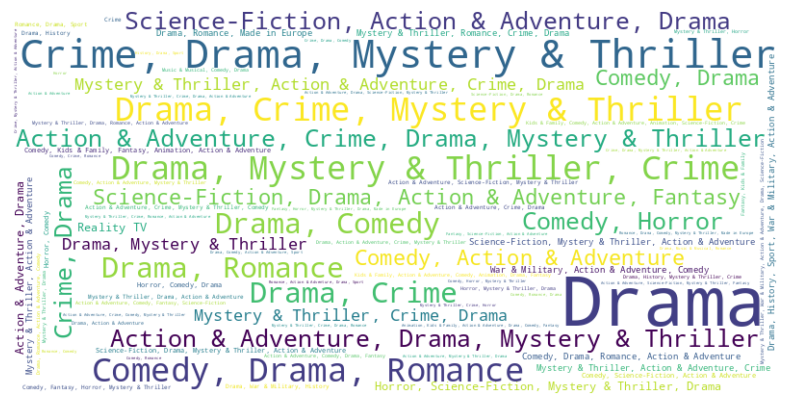

In [ ]:
#Let's Visvalize it using word cloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_count)

# Create a Word Cloud from the genre frequencies and display it using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

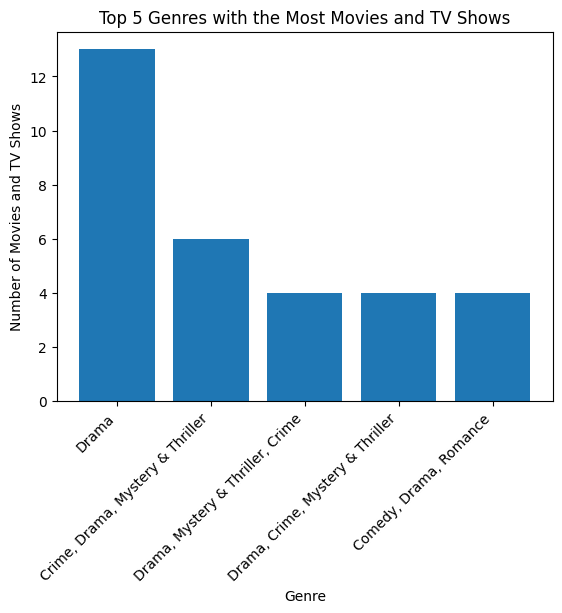

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x =top_5_genres_visulalize.index,height =top_5_genres_visulalize.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
# Counting Streaming Service
streaming_service_counts = final_data1['streaming_service'].value_counts().sort_values(ascending=False)

In [ ]:
# Streaming Services name with their count
streaming_service_counts

,count
streaming_service,
Netflix,41
"Amazon Prime Video , Amazon Prime Video",20
,16
Hotstar,14
Jio Cinema,14
...,...
"Zee5 , VI movies and tv",1
"Apple TV , Hotstar , Netflix , Amazon Video , Apple TV , Apple TV",1
"Jio Cinema , Zee5 , Hotstar , Jio Cinema",1


In [ ]:
# Streaming sevice name according to their count
top_streaming_service_name = streaming_service_counts.head(1).index.str.cat(sep="")

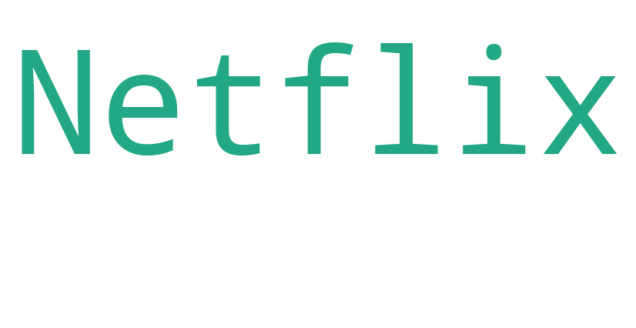

In [ ]:
#Let's Visvalize it using word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Taking text data from streaming service names
text_data = top_streaming_service_name

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

## **Task 3 :- Data Export**

In [191]:
#saving final dataframe as Final Data in csv format
final_data.to_csv('Final Data.csv')

In [192]:
#saving filter data as Filter Data in csv format
data_filtered.to_csv('Filtered Data.csv')

In [194]:
# To access files from your Google Drive in Colab, you need to mount it
from google.colab import drive
drive.mount('/content/drive')

# Access the CSV file
filtereddata_file_path = '/content/drive/MyDrive/AlmaBetter Projects/Module 2/Mid Course Summative Assignment/Filtered Data.csv'
finaldata_file_path = '/content/drive/MyDrive/AlmaBetter Projects/Module 2/Mid Course Summative Assignment/Final Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Drive Link (View Access with Anyone) -**

https://colab.research.google.com/drive/1kdlWRCQ-qhnvpCTY1_tz7vREgA_ZpK4G#scrollTo=j6F3wrlGWOcl

# ***Congratulations!!! You have completed your Assignment.***